# K-Means Clustering

### Steps:
1.Reading And understanding data
2.Data Cleaning and visualization
3.Outlier Treatment
4.Prepare data for Modelling
5.Modelling
6.Final Analysis and results
 

## 1. Reading And Understanding data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\q6\Downloads\Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2.Data Cleaning

In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

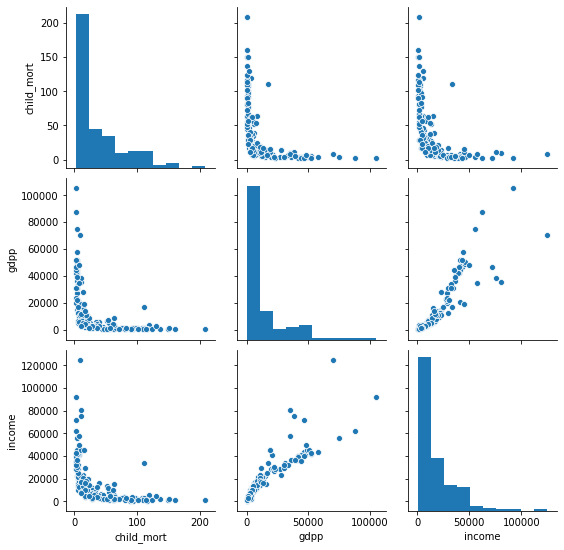

In [7]:
sns.pairplot(data=data, x_vars=['child_mort','gdpp','income'],y_vars=['child_mort','gdpp','income'],kind='scatter')

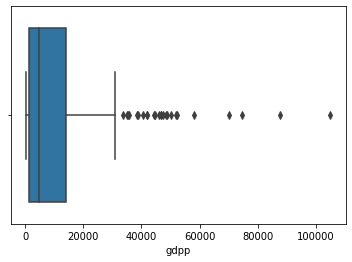

In [8]:
sns.boxplot(data['gdpp'])

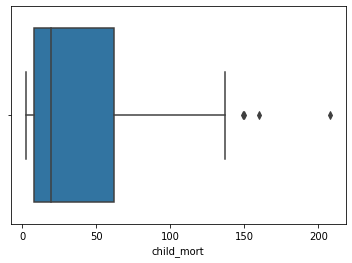

In [9]:
sns.boxplot(data['child_mort'])

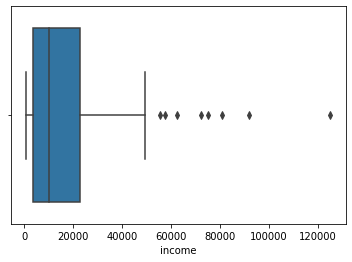

In [10]:
sns.boxplot(data['income'])

## 4.Outlier Treatment

In [11]:
q1 = data['child_mort'].quantile(0.05)
q2 = data['child_mort'].quantile(0.95)
q3 = q2-q1
data=data[(data['child_mort'] >=q1-1.5*q3) & (data['child_mort'] <= q2+1.5*q3)]


q1 = data['gdpp'].quantile(0.05)
q2 = data['gdpp'].quantile(0.95)
q3 = q2-q1
data=data[(data['gdpp'] >=q1-1.5*q3) & (data['gdpp'] <= q2+1.5*q3)]

q1 = data['income'].quantile(0.05)
q2 = data['income'].quantile(0.95)
q3 = q2-q1
data=data[(data['income'] >=q1-1.5*q3) & (data['income'] <= q2+1.5*q3)]

## 5.Preparing data for modelling

In [12]:
data_df =data[['country','child_mort','income','gdpp']]
data_df1=data[['child_mort','income','gdpp']]
data_df1

,child_mort,income,gdpp
0,90.2,1610,553
1,16.6,9930,4090
2,27.3,12900,4460
3,119.0,5900,3530
4,10.3,19100,12200
...,...,...,...
162,29.2,2950,2970
163,17.1,16500,13500
164,23.3,4490,1310
165,56.3,4480,1310


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled = scaler.fit_transform(data_df1)

In [14]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns =['child_mort','income','gdpp']

In [15]:
data_scaled

,child_mort,income,gdpp
0,1.285341,-0.857748,-0.678732
1,-0.542572,-0.378307,-0.479766
2,-0.276829,-0.207160,-0.458953
3,2.000611,-0.610536,-0.511268
4,-0.699037,0.150116,-0.023556
...,...,...,...
161,-0.229641,-0.780531,-0.542769
162,-0.530154,0.000291,0.049572
163,-0.376172,-0.691788,-0.636149
164,0.443408,-0.692364,-0.636149


## 5.Modelling

In [16]:
# Using K-Means
from sklearn.cluster import KMeans

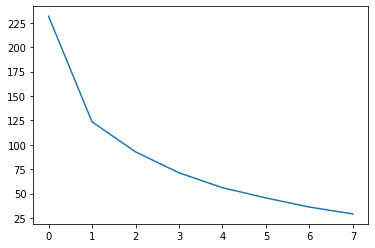

In [17]:
# Using ssd
ssd=[]
num = [2,3,4,5,6,7,8,9]
for i in num:
    kmeans =KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(data_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)
    

In [18]:
## Using silhouette score

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
for i in num:
    kmeans =KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(data_scaled)
    sil = silhouette_score(data_scaled,kmeans.labels_)
    print('cluster{0},Score{1}'.format(i,sil))
    

cluster2,Score0.5655742072957856
cluster3,Score0.5311874946349608
cluster4,Score0.531699886308155
cluster5,Score0.4592409788484651
cluster6,Score0.4649768562272423
cluster7,Score0.4684128511889674
cluster8,Score0.4514761267187617
cluster9,Score0.46638758400994856


In [21]:
## from both ssd and sil tae=ke number of cluster as 4

In [22]:
kmeans =KMeans(n_clusters=4,max_iter=50)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([1, 3, 3, 1, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3,
       3, 2, 3, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0,
       0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 3, 1, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 3, 0, 1, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3,
       0, 0, 1, 1, 2, 0, 1, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 0, 1, 3, 3, 1,
       2, 3, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 2, 3, 1, 3, 1, 1, 3, 3, 3, 1,
       1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1])

In [24]:
data_df['Labels']= kmeans.labels_
data_df

,country,child_mort,income,gdpp,Labels
0,Afghanistan,90.2,1610,553,1
1,Albania,16.6,9930,4090,3
2,Algeria,27.3,12900,4460,3
3,Angola,119.0,5900,3530,1
4,Antigua and Barbuda,10.3,19100,12200,3
...,...,...,...,...,...
162,Vanuatu,29.2,2950,2970,3
163,Venezuela,17.1,16500,13500,3
164,Vietnam,23.3,4490,1310,3
165,Yemen,56.3,4480,1310,1


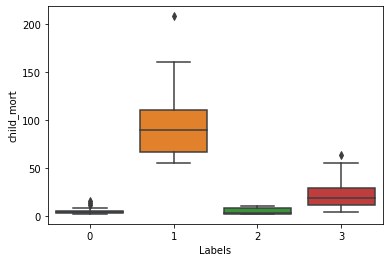

In [25]:
sns.boxplot(y='child_mort',x='Labels',data=data_df)

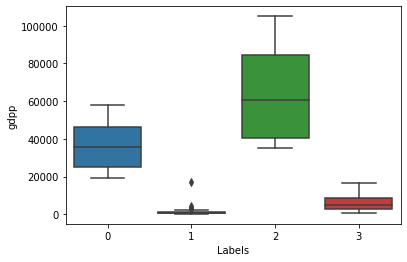

In [26]:
sns.boxplot(y='gdpp',x='Labels',data=data_df)

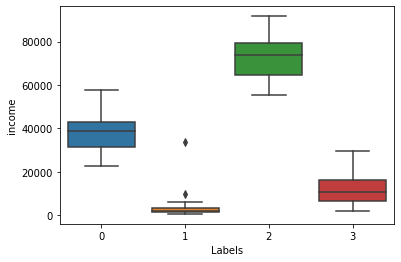

In [27]:
sns.boxplot(y='income',x='Labels',data=data_df)

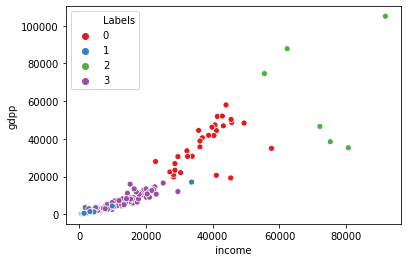

In [38]:
sns.scatterplot(x='income',y='gdpp',hue='Labels',data=data_df,palette='Set1')

# Hierarchial Clustering

In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

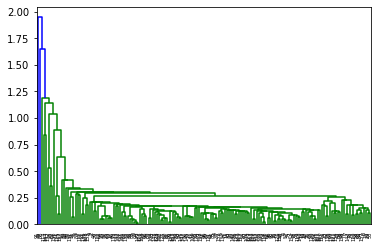

In [29]:
mergings = linkage(data_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

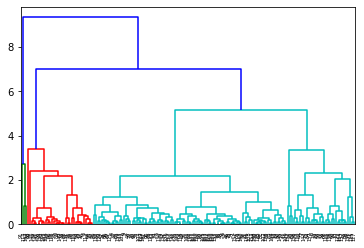

In [30]:
mergings = linkage(data_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [31]:
labels = cut_tree(mergings,n_clusters=4).reshape(-1)
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [32]:
data_df['H_Labels']=labels

In [33]:
data_df

,country,child_mort,income,gdpp,Labels,H_Labels
0,Afghanistan,90.2,1610,553,1,0
1,Albania,16.6,9930,4090,3,1
2,Algeria,27.3,12900,4460,3,1
3,Angola,119.0,5900,3530,1,0
4,Antigua and Barbuda,10.3,19100,12200,3,1
...,...,...,...,...,...,...
162,Vanuatu,29.2,2950,2970,3,1
163,Venezuela,17.1,16500,13500,3,1
164,Vietnam,23.3,4490,1310,3,1
165,Yemen,56.3,4480,1310,1,1


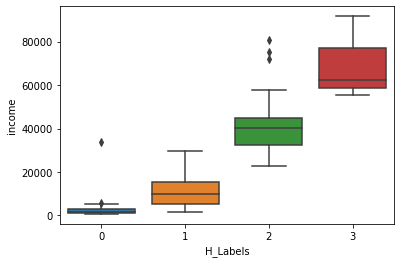

In [34]:
sns.boxplot(data=data_df,x='H_Labels',y='income')

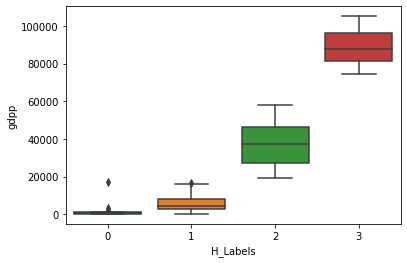

In [35]:
sns.boxplot(y='gdpp',x='H_Labels',data=data_df)

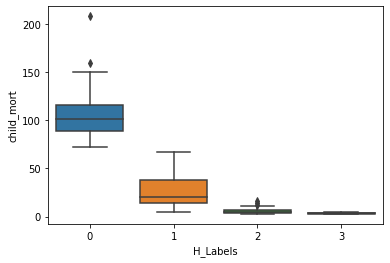

In [36]:
sns.boxplot(y='child_mort',x='H_Labels',data=data_df)

In [37]:
data_df.loc[data_df['Labels']==0]

,country,child_mort,income,gdpp,Labels,H_Labels
7,Australia,4.8,41400,51900,0,2
8,Austria,4.3,43200,46900,0,2
10,Bahamas,13.8,22900,28000,0,2
11,Bahrain,8.6,41100,20700,0,2
15,Belgium,4.5,41100,44400,0,2
29,Canada,5.6,40700,47400,0,2
42,Cyprus,3.6,33900,30800,0,2
43,Czech Republic,3.4,28300,19800,0,2
44,Denmark,4.1,44000,58000,0,2
53,Finland,3.0,39800,46200,0,2
